# 🧩 EDA: Credit Score Segmentation

Welcome to the full 21-step Exploratory Data Analysis (EDA) notebook for the **Credit Score Segmentation** scenario.  
This is an **unsupervised machine learning** problem, where we explore customer financial profiles and group them into meaningful clusters.

---

📁 **Dataset:** `EDA_CreditScoreSegmentation_Dataset.csv`  
📌 **Goal:** Use EDA to clean, understand, and segment data  
📊 **Techniques:** Skewness, Outliers, Correlations, PCA, Clustering, Statistical EDA  


## 📥 Step 1: Load Dataset

In [22]:

import pandas as pd
df = pd.read_csv("EDA_CreditScoreSegmentation_Dataset.csv")
df.head()


,customer_id,age,income,employment_status,credit_card_limit,num_credit_cards,credit_score,loan_balance,avg_monthly_spend,missed_payments,region
0,CUST00000,56,42952.26,Unemployed,9026.70,0,774.0,13882.23,2142.49,2,West
1,CUST00001,69,69507.31,Freelancer,16004.73,1,754.0,6338.18,1373.80,1,East
2,CUST00002,46,72649.08,Freelancer,9410.59,6,720.0,13418.14,1397.71,0,Central
3,CUST00003,32,50516.44,Unemployed,12264.08,2,728.0,35450.65,2103.35,3,West
4,CUST00004,60,44564.56,Retired,12156.74,4,802.0,15181.27,1528.36,0,South


## 🧾 Step 2: Dataset Overview

In [23]:

print("Shape:", df.shape)
df.info()
df.describe(include='all').T


Shape: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   age                10000 non-null  int64  
 2   income             10000 non-null  float64
 3   employment_status  10000 non-null  object 
 4   credit_card_limit  10000 non-null  float64
 5   num_credit_cards   10000 non-null  int64  
 6   credit_score       10000 non-null  float64
 7   loan_balance       10000 non-null  float64
 8   avg_monthly_spend  10000 non-null  float64
 9   missed_payments    10000 non-null  int64  
 10  region             10000 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000,10000,CUST00000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,43.5394,14.911636,18.0,31.0,43.0,56.0,69.0
income,10000.0,NaN,NaN,NaN,59996.199105,20092.985802,-18448.01,46564.5975,59942.99,73532.5825,130581.1
employment_status,10000,4,Employed,5962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_card_limit,10000.0,NaN,NaN,NaN,9972.428211,2990.125131,-3396.81,7905.7675,9992.105,12022.95,21074.87
num_credit_cards,10000.0,NaN,NaN,NaN,2.0002,1.412161,0.0,1.0,2.0,3.0,10.0
credit_score,10000.0,NaN,NaN,NaN,680.7964,50.272319,472.0,646.0,681.0,715.0,850.0
loan_balance,10000.0,NaN,NaN,NaN,14877.974364,14985.761446,1.51,4134.1125,10335.495,20732.7775,176120.56
avg_monthly_spend,10000.0,NaN,NaN,NaN,1800.888701,607.110772,-877.78,1399.625,1800.89,2206.735,3963.35
missed_payments,10000.0,NaN,NaN,NaN,1.4909,1.215592,0.0,1.0,1.0,2.0,8.0


## 📊 Step 3: Univariate Analysis

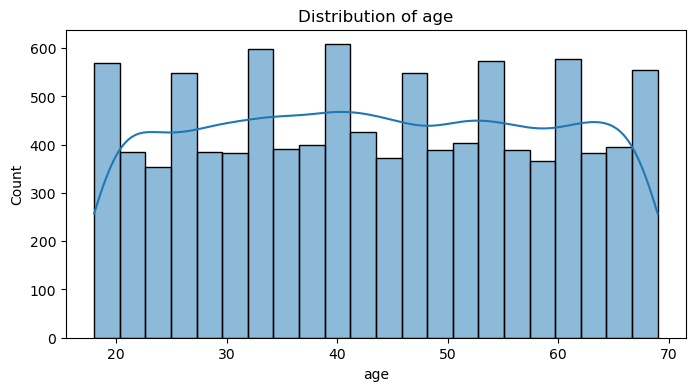

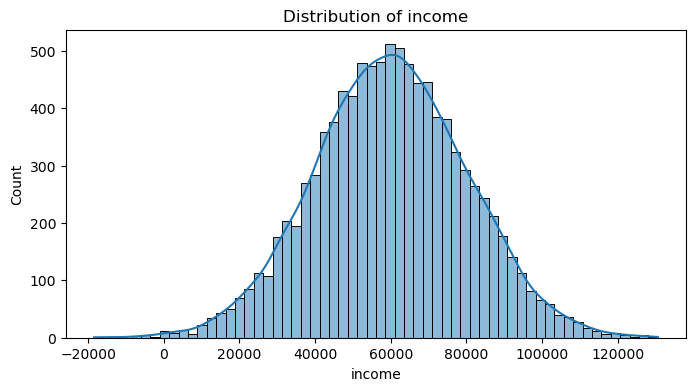

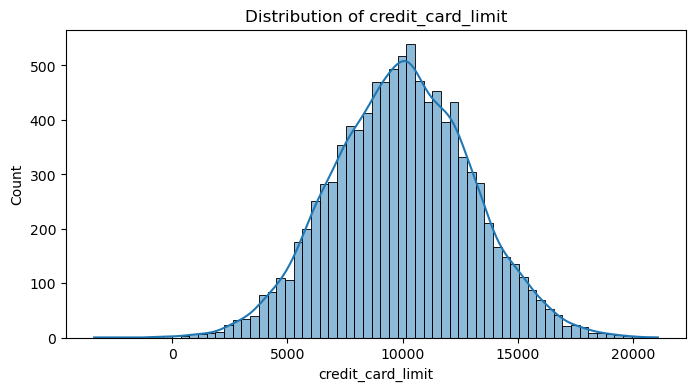

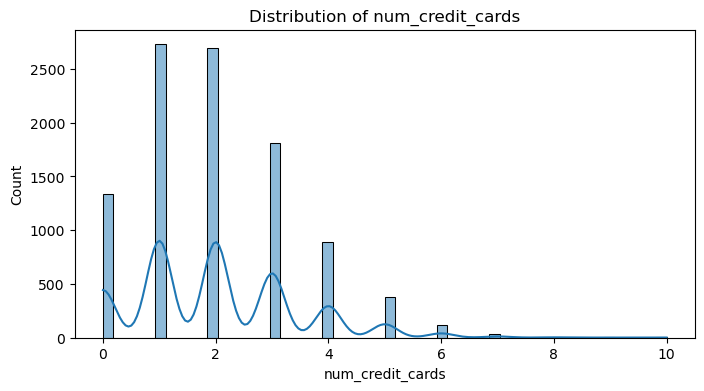

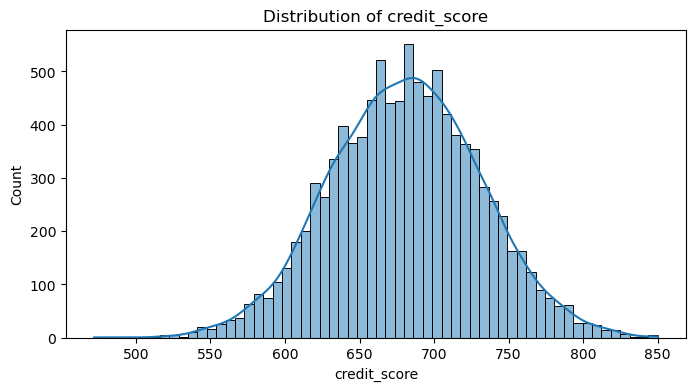

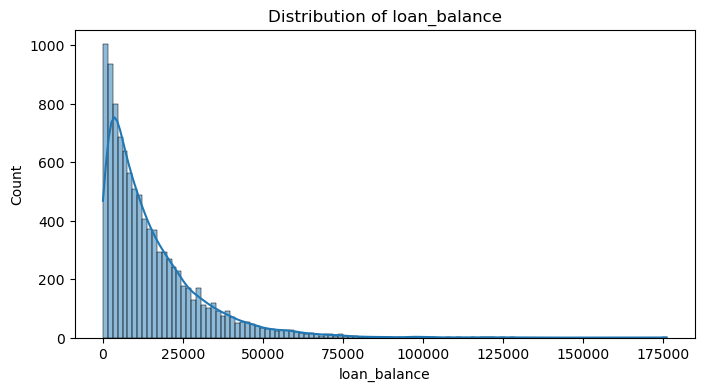

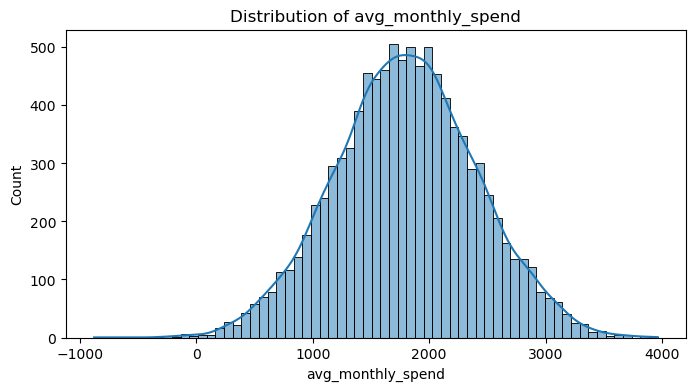

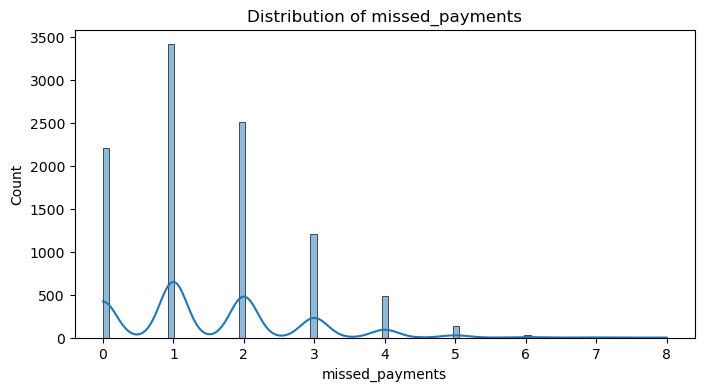

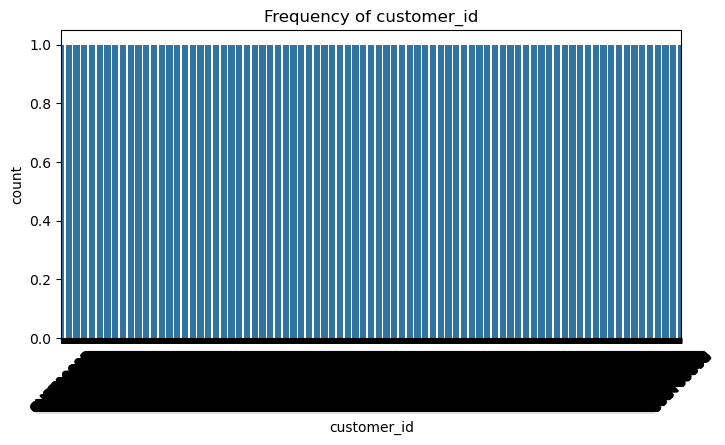

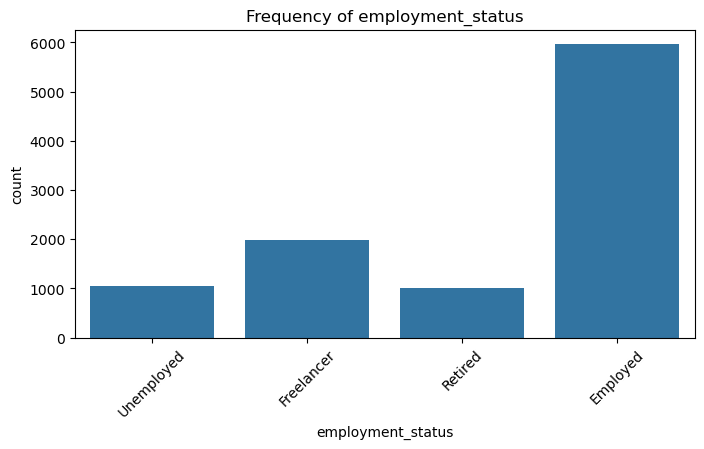

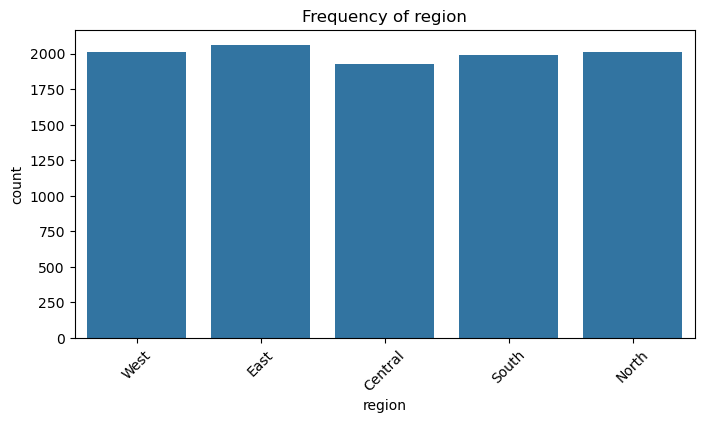

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 📉 Step 4: Bivariate Analysis

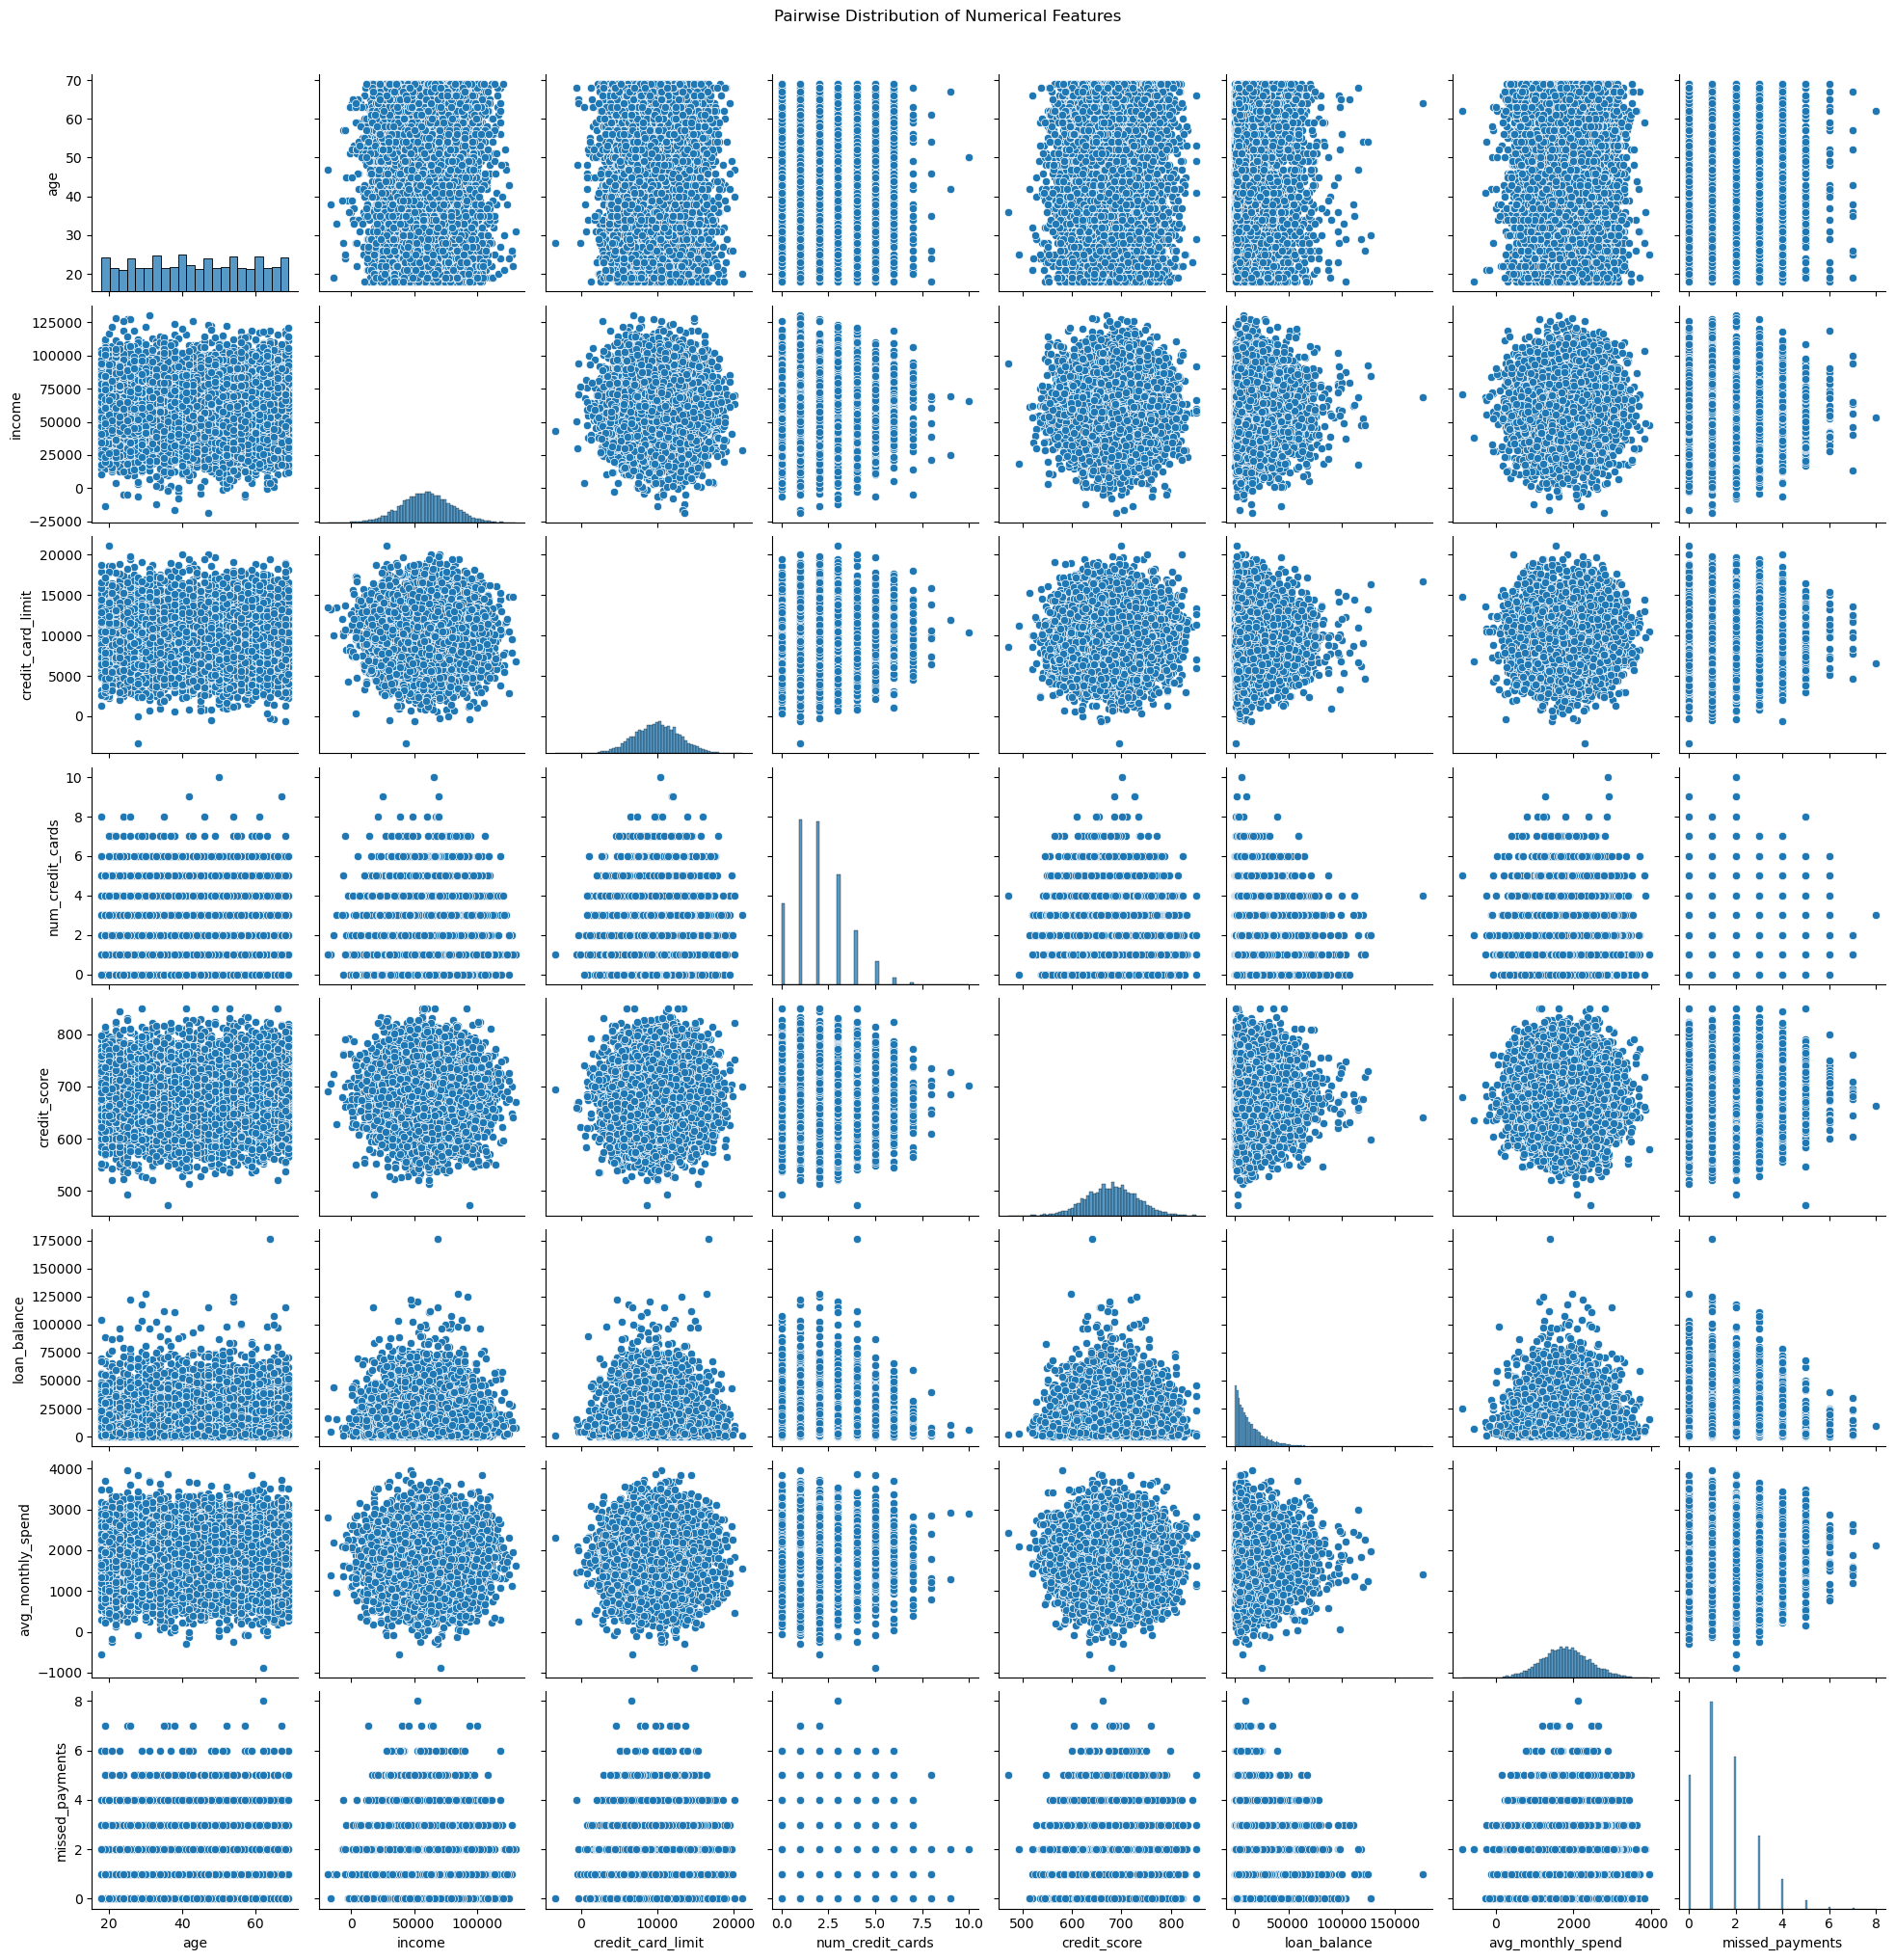

In [25]:

sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Distribution of Numerical Features", y=1.02)
plt.show()


## 📊 Step 5: Multivariate Analysis

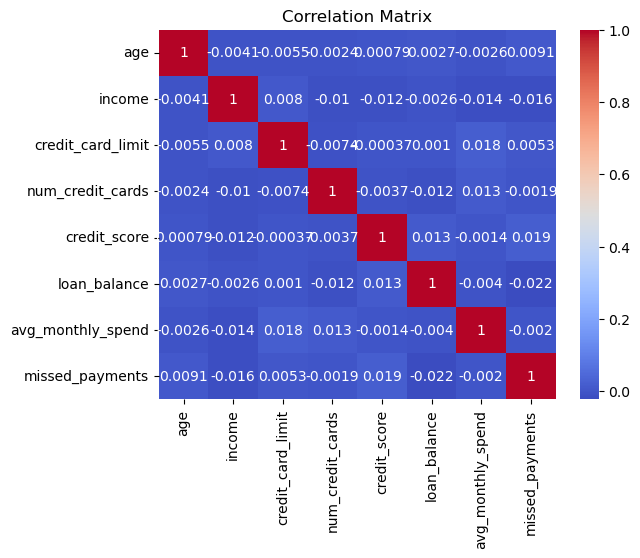

In [26]:

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## ❓ Step 6: Missing Value Analysis

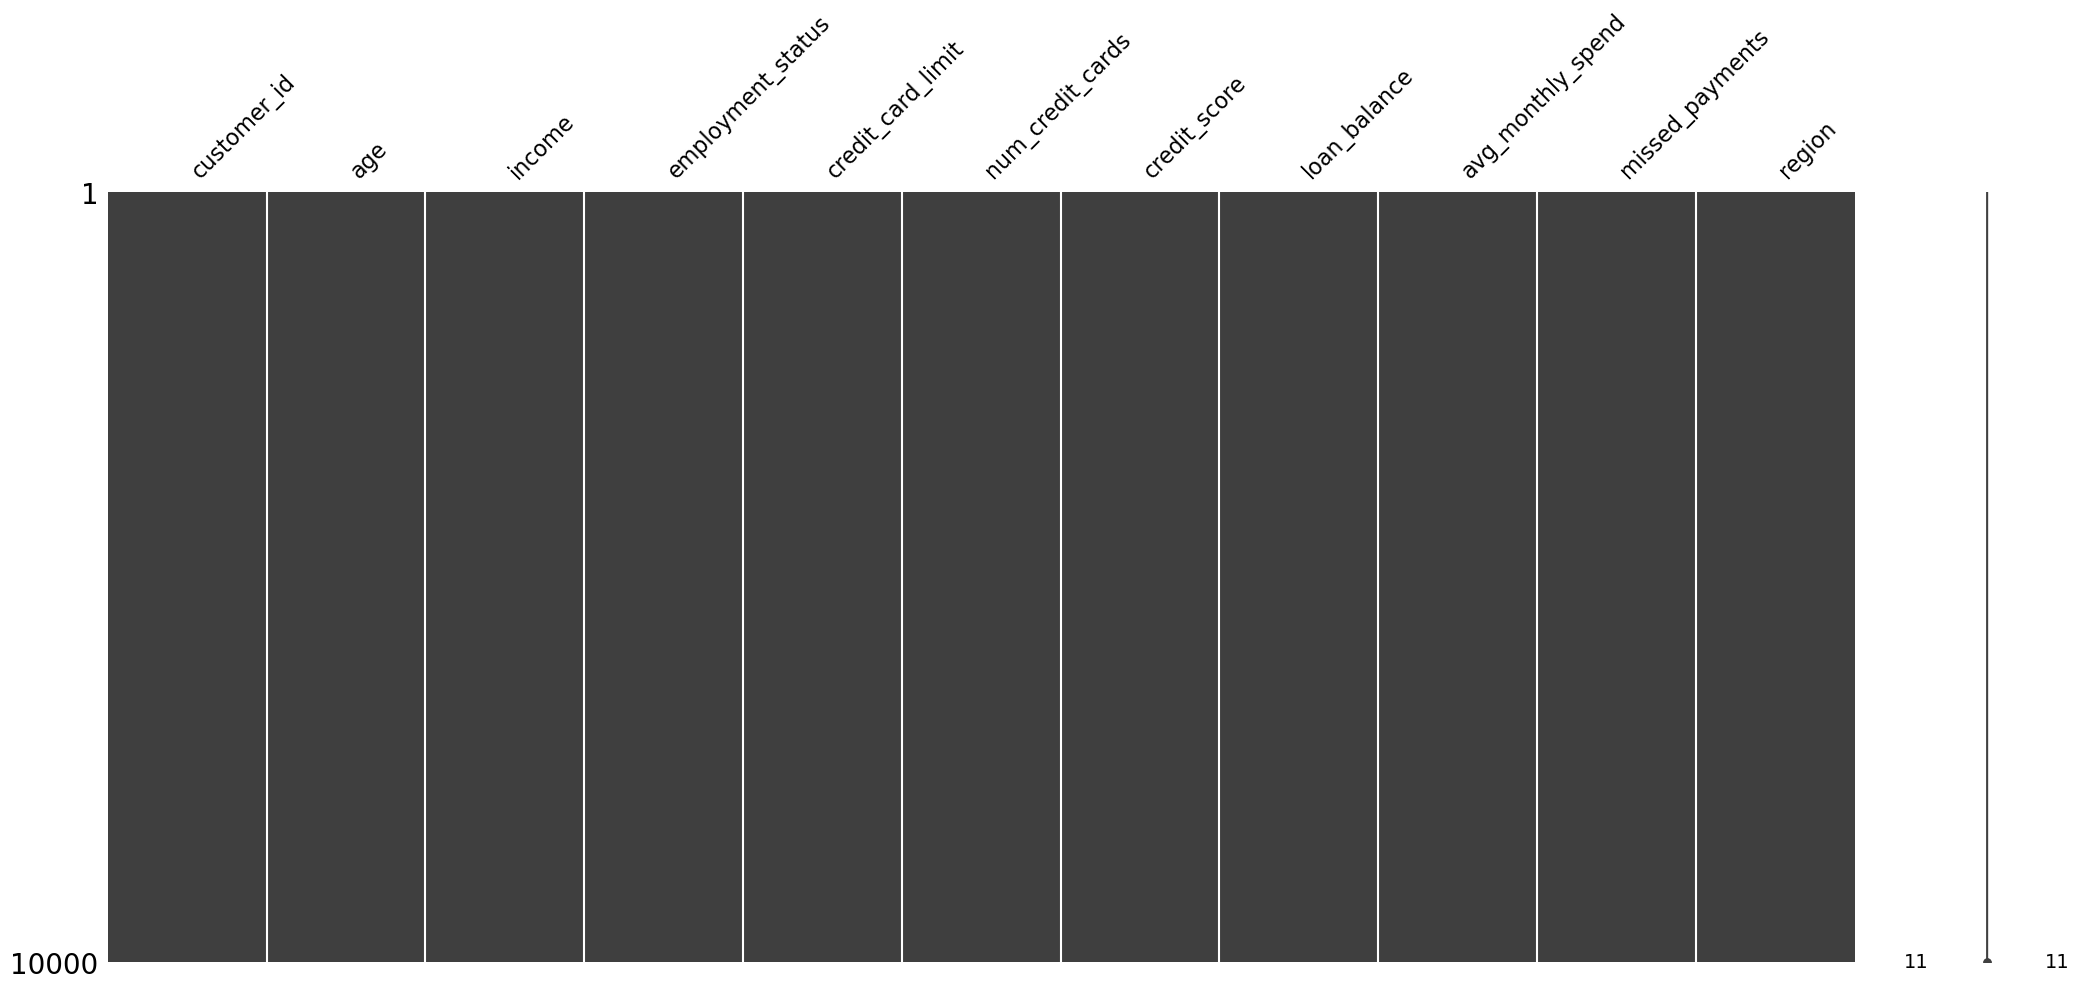

In [27]:

import missingno as msno
msno.matrix(df)
plt.show()


## 🚨 Step 7: Outlier Detection

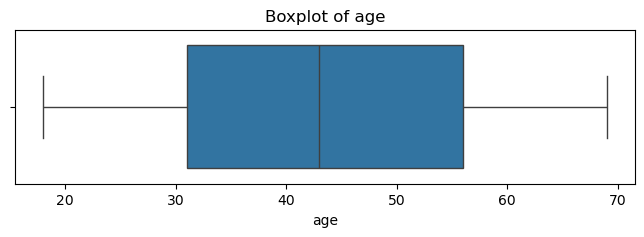

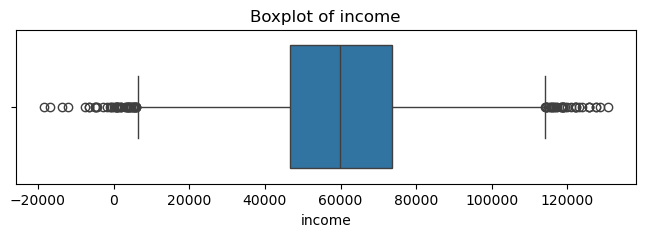

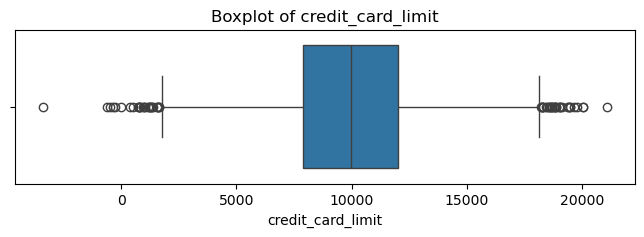

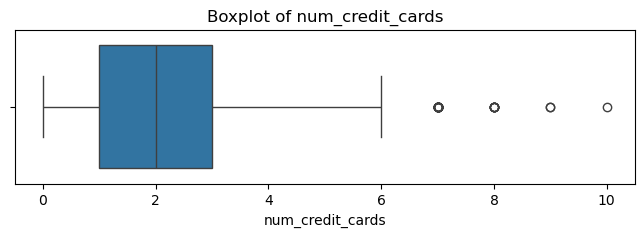

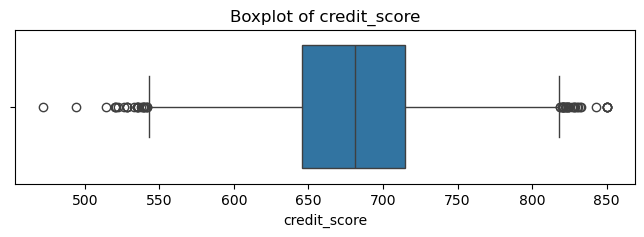

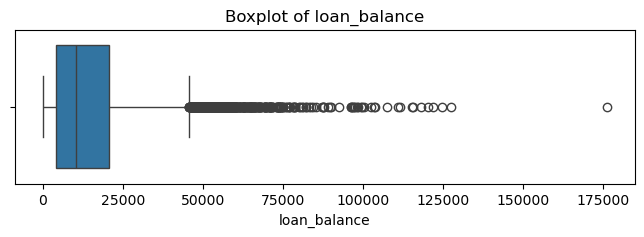

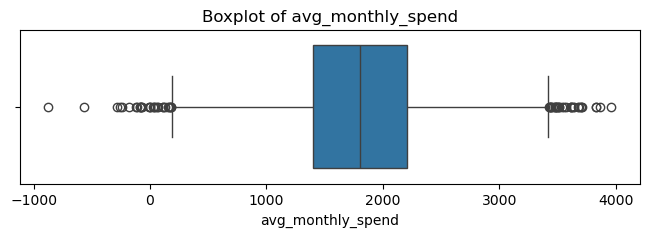

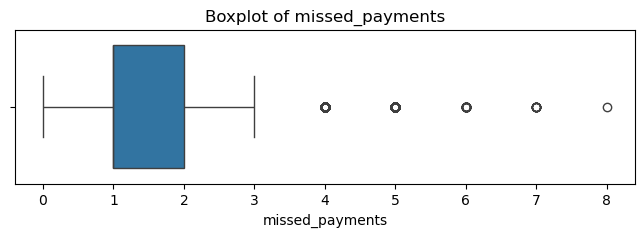

In [28]:

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 🔄 Step 8: Skewness & Transformation

In [29]:

from scipy.stats import skew
import numpy as np

skew_vals = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print(skew_vals)

for col in skew_vals[skew_vals > 1].index:
    df[f'{col}_log'] = np.log1p(df[col])


age                  0.002017
income              -0.000438
credit_card_limit    0.007679
num_credit_cards     0.705614
credit_score         0.000143
loan_balance         2.058072
avg_monthly_spend   -0.001673
missed_payments      0.828000
dtype: float64


## 🎯 Step 9: PCA Visualization

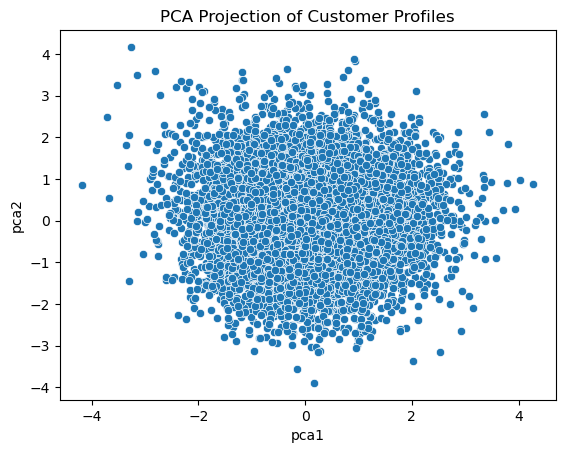

In [30]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled = StandardScaler().fit_transform(df[numerical_cols])
pca = PCA(n_components=2).fit_transform(scaled)
df['pca1'], df['pca2'] = pca[:, 0], pca[:, 1]

sns.scatterplot(x='pca1', y='pca2', data=df)
plt.title("PCA Projection of Customer Profiles")
plt.show()


## 🔍 Step 10: KMeans Clustering

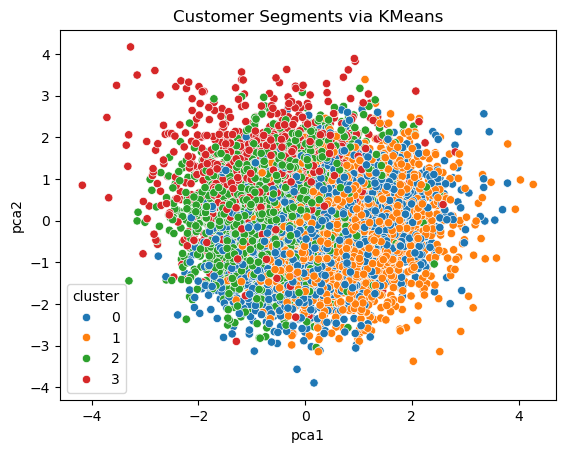

In [31]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='tab10', data=df)
plt.title("Customer Segments via KMeans")
plt.show()


## 🛠️ Step 11: Feature Engineering Hints

In [32]:

df['spend_to_limit_ratio'] = df['avg_monthly_spend'] / (df['credit_card_limit'] + 1)
df['debt_to_income_ratio'] = df['loan_balance'] / (df['income'] + 1)
df[['spend_to_limit_ratio', 'debt_to_income_ratio']].describe()


,spend_to_limit_ratio,debt_to_income_ratio
count,10000.000000,10000.000000
mean,0.194276,0.323522
std,0.882947,1.505699
min,-86.490920,-21.856784
25%,0.132541,0.070355
50%,0.179052,0.177282
75%,0.245060,0.370451
max,4.380371,93.567037


## 🧼 Step 12: Data Quality Check

In [33]:

print("Duplicates:", df.duplicated().sum())
zero_var_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Zero-variance columns:", zero_var_cols)


Duplicates: 0
Zero-variance columns: []


## ⏱️ Step 13: Time Profiling (if applicable)

In [34]:

# Placeholder: No temporal feature in dataset
print("No time series features available.")


No time series features available.


## 🧩 Step 14: Multicollinearity (VIF)

In [35]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[numerical_cols].dropna()
X = add_constant(X)
pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    "Feature": X.columns
})


,VIF,Feature
0,226.812646,const
1,1.000150,age
2,1.000795,income
3,1.000511,credit_card_limit
4,1.000501,num_credit_cards
5,1.000693,credit_score
6,1.000858,loan_balance
7,1.000723,avg_monthly_spend
8,1.001210,missed_payments


## 🔁 Step 15: Interaction Effects

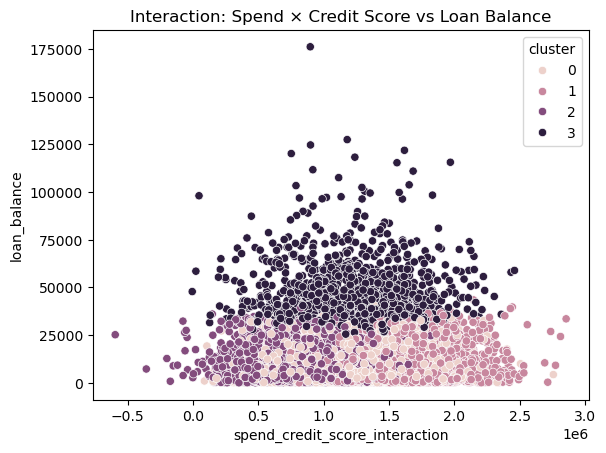

In [36]:

df['spend_credit_score_interaction'] = df['avg_monthly_spend'] * df['credit_score']
sns.scatterplot(x='spend_credit_score_interaction', y='loan_balance', hue='cluster', data=df)
plt.title("Interaction: Spend × Credit Score vs Loan Balance")
plt.show()


## 🧯 Step 16: Data Leakage Check

In [37]:

# No target available, so no leakage from labels
print("Unsupervised setting — target leakage not applicable.")


Unsupervised setting — target leakage not applicable.


## ⚖️ Step 17: Cluster Balance Insight

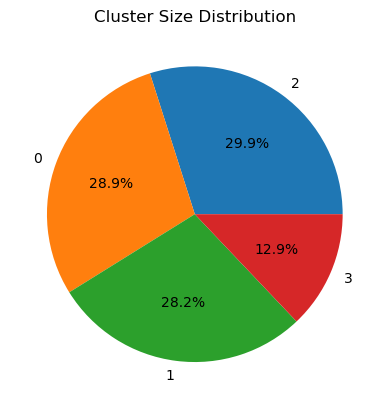

In [38]:

df['cluster'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Cluster Size Distribution")
plt.ylabel("")
plt.show()


## 🔢 Step 18: Cardinality Check

In [39]:

df[categorical_cols].nunique()


customer_id          10000
employment_status        4
region                   5
dtype: int64

## 📈 Step 19: Cluster Summary Stats

In [40]:

df.groupby("cluster")[numerical_cols].mean().T


cluster,0,1,2,3
age,41.706390,45.070872,43.683383,43.968266
income,65577.717800,48023.930918,66064.267981,59591.903591
credit_card_limit,12675.758777,9134.876003,8121.836593,10028.581362
num_credit_cards,1.763040,2.392275,1.885991,1.939628
credit_score,678.216235,699.576187,664.652290,682.932663
loan_balance,10103.807326,10673.662112,10468.188853,44967.332887
avg_monthly_spend,1835.739682,2227.250425,1373.055390,1781.974659
missed_payments,2.055268,1.217576,1.239385,1.405573


## 🤖 Step 20: AutoEDA Tools

In [41]:

# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="AutoEDA Report: Credit Segmentation", explorative=True)
profile.to_file("autoeda_credit_segmentation.html")


Summarize dataset:  80%|████████  | 20/25 [00:00<00:00, 53.96it/s, Calculate auto correlation]                       /Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 0 6 ... 0 6 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 87.12it/s]


## 📐 Step 21: Statistical EDA

In [42]:

from scipy.stats import f_oneway

for col in numerical_cols:
    groups = [group[col].values for name, group in df.groupby('cluster')]
    stat, p = f_oneway(*groups)
    print(f"ANOVA for {col}: p = {p:.4f}")


ANOVA for age: p = 0.0000
ANOVA for income: p = 0.0000
ANOVA for credit_card_limit: p = 0.0000
ANOVA for num_credit_cards: p = 0.0000
ANOVA for credit_score: p = 0.0000
ANOVA for loan_balance: p = 0.0000
ANOVA for avg_monthly_spend: p = 0.0000
ANOVA for missed_payments: p = 0.0000
